# EDA of Haberman's survival Data

1) This is the case study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


2) Let's check how many data set are there and what is the sigificans of the dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\hatia\\Desktop\\My-Study\\assements\\habermans-survival-data-set'

In [3]:
os.chdir(r'C:\Users\hatia\Desktop\My-Study\assements\habermans-survival-data-set')

In [4]:
#help(pd.read_csv)
hs = pd.read_csv('haberman.csv')
print(hs.head())
print(hs.shape)

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1
(305, 4)


3) These dataset contain 305 values but column names are missing 

4)So we need to add coulmn name for doing the analysis in easy way.

5)I found the colum name from kaggel and do some google for auxillary _node

In [5]:
hs.columns=['Ages','Year(1900)','positive_lymph_nodes','Survival status']
hs.columns

Index(['Ages', 'Year(1900)', 'positive_lymph_nodes', 'Survival status'], dtype='object')

# Information about dataset

1. First column is about Age of the patient.
2. Second column is about year(1900) i.e people operated in the year 19XX (inbetween 1958 to 1970).
3. Third column is about number of positive_lymph_nodes(the nodes which are responsible for cancer) i.e number of tumors found.
4. Fourth column is about Survival status of person after operation
    1 - Shows about the person survived 5 years or longer.
    2-  Shows about the person died in less than 5 years.
    
5. Lymph nodes are small round organs that are part of the body’s lymphatic system. They are found widely throughout the body and are connected to one another by lymph vessels. Groups of lymph nodes are located in the neck, underarms, chest, abdomen, and groin
6. Lymph nodes are also important in helping to determine whether cancer cells have developed the ability to spread to other parts of the body. Many types of cancer spread through the lymphatic system, and one of the earliest sites of spread for these cancers is nearby lymph nodes.

In [6]:
#Let see how many datapoint are present for this dataset
print(hs['Survival status'].value_counts())
print("minimum age",hs['Ages'].min(),"Maximum age",hs['Ages'].max())
print()
#form the value count we can able to see how many patient are able live more than 5 years(1) or less than 5 years(2)

1    224
2     81
Name: Survival status, dtype: int64
minimum age 30 Maximum age 83



In [12]:
#Let's get some observation of dataset
hs.describe()

,Ages,Year(1900),positive_lymph_nodes,Survival status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


1)  From the above dataset we can see that age of patient is lie between 30 to 83 with median 52

2)  75 % patient has less than 5 postive lymph node and 25 % patinet has no lymph node

3) But from the above summrization survival status is not clear


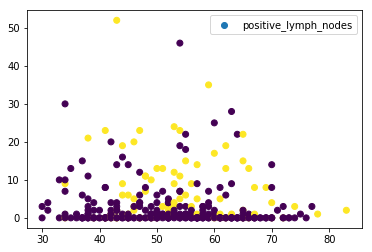

In [11]:
#Form the above data set we can see ages and positive lymph node are two vital factor for suviving the patient in operation 
# So let's draw a 2-D scatter plot using these two 

#help(hs.plot)
#hs.plot(kind='scatter',x='Ages',y='positive_lymph_nodes',grid='True')
plt.scatter(x='Ages',y='positive_lymph_nodes',data=hs,c='Survival status')
plt.legend()
plt.show()


we can see most of the patinet had 0 postive lymph node . But we are not able to view the survival status clearly .

2-D Scatter plot with color-coding for each survival status type/class.


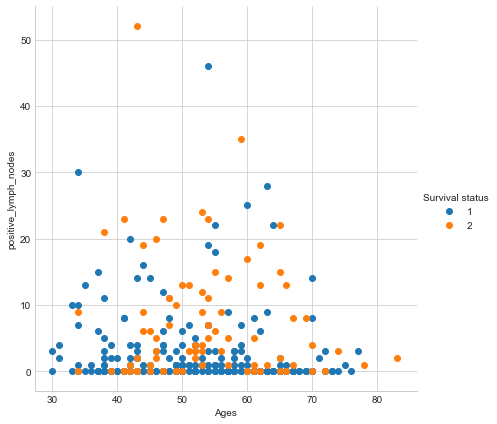

In [14]:
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(hs, hue="Survival status", size=6) \
   .map(plt.scatter, "Ages", "positive_lymph_nodes") \
   .add_legend();
plt.show()

# Observations:

1) It seems most of the patients have 0 positive lypmh nodes detected.
2) Here we clearly see that blue points are not seperated from orange points.
3) So, by looking this 2-D scatter plot between 'Ages' and 'positive_lymph_nodes' we cannot make any decision regarding patient's survival.
4) Therefore, we have to check all combination features to make good decision.
5) Number of Combinations of features : 3C2 = 3

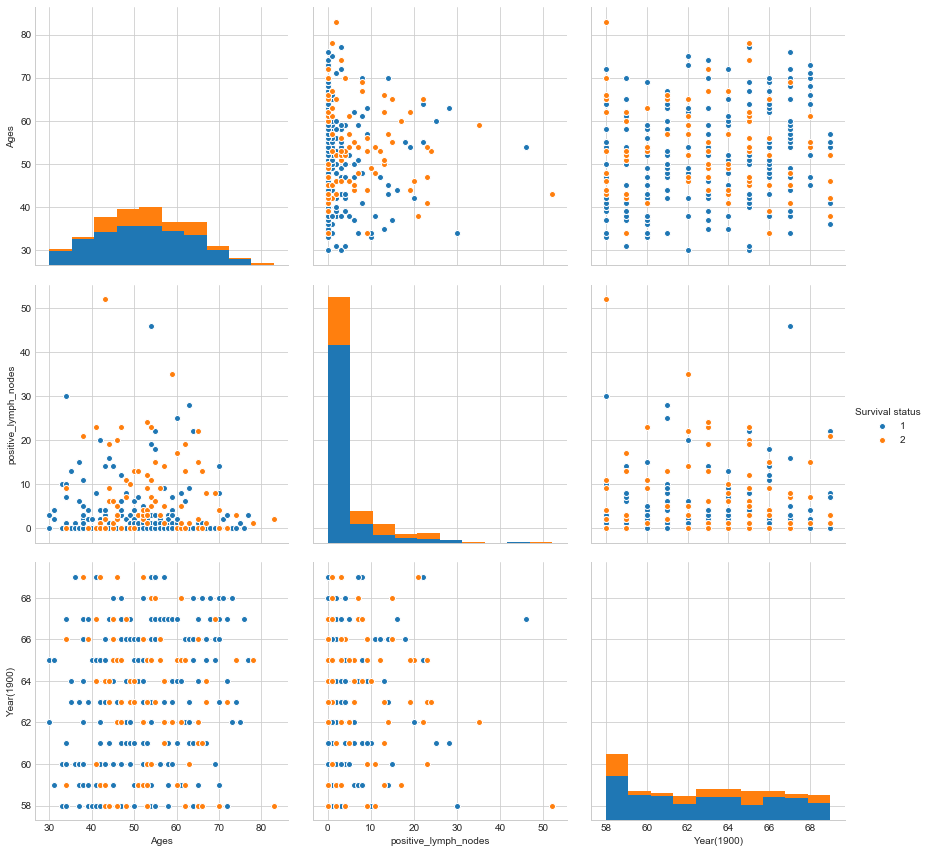

In [15]:
#help(sns.pairplot)
plt.close()
sns.set_style("whitegrid")
sns.pairplot(hs , hue ='Survival status' ,
             vars=["Ages","positive_lymph_nodes","Year(1900)"], size = 4)
plt.show()

1) This pair plot is not much have conclusion , but from ages vs positive_lumph_node grap we can get some idea that , which patinet has 0 lymph node had survived more .

# Histogram ,PDF (Univariant data analysis)

C:\Users\hatia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hatia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


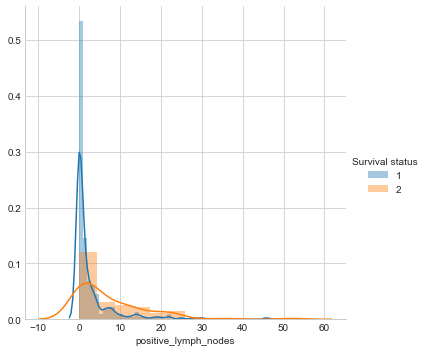

In [16]:
sns.FacetGrid(hs, hue="Survival status", size=5) \
   .map(sns.distplot, "positive_lymph_nodes") \
   .add_legend();
plt.show();

C:\Users\hatia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hatia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


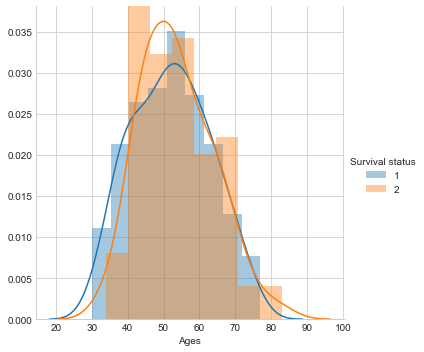

In [17]:
sns.FacetGrid(hs, hue="Survival status", size=5) \
   .map(sns.distplot, "Ages") \
   .add_legend();
plt.show();

C:\Users\hatia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hatia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


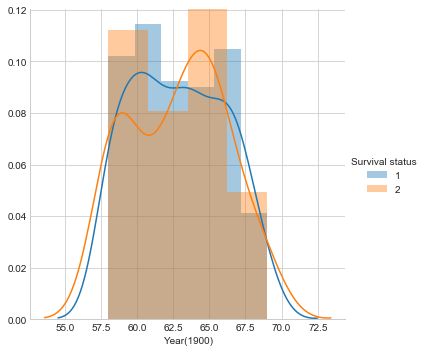

In [18]:
sns.FacetGrid(hs, hue="Survival status", size=5) \
   .map(sns.distplot, "Year(1900)") \
   .add_legend();
plt.show();

Form the above pdf and histogram we can find that ages and years are not good feature for predicitaing patient survival, but positive_lymph_node is better feature



# CDF

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


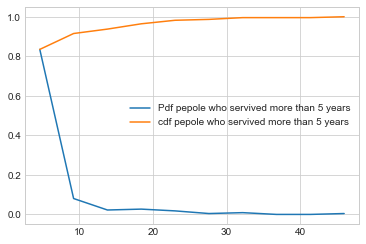

In [29]:
#We need to check the Cumulative Distribution Function (CDF)
#We have to the check how many pepole servived whose have less number of lymph nodes
more5 = hs.loc[hs["Survival status"]== 1]
less5 = hs.loc[hs["Survival status"]== 2]

#print(more5['positive_lymph_nodes'])
#help(np.histogram)

counts, bin_edges = np.histogram(more5['positive_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(["Pdf pepole who servived more than 5 years","cdf pepole who servived more than 5 years"])
plt.show()

In [5]:
counts, bin_edges = np.histogram(less5['positive_lymph_nodes'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(["Pdf pepole who servived less than 5 years","cdf pepole who servived less than 5 years"])
plt.show()

NameError: name 'less5' is not defined

#Checking the summary statics of serviving and not surviving

# Mean, Variance and Std-dev

In [51]:
print("Summary of person who servived more than 5 years")
more5.describe()

Summary of person who servived more than 5 years


,Ages,Year(1900),positive_lymph_nodes,Survival status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [52]:
print("Summary of person who  has not servived more than 5 years")
less5.describe()

Summary of person who  has not servived more than 5 years


,Ages,Year(1900),positive_lymph_nodes,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# observation

1) From above summary we can get that less number of lymph node patient servived more that high lymph node patient 
2) Till max 46 lymph node patient was serevived more than 5 year .
3) On the servivial status 75% pepole has 3 lymph node .


# Median, Percentile, Quantile, IQR, MAD

In [56]:
#Median, Quantiles, Percentiles, IQR.
print("Medians:")
print("Median of pepole servived: ",np.median(more5["positive_lymph_nodes"]))
#Median with an outlier
print("Median of pepol serived with outlier: ",np.median(np.append(more5["positive_lymph_nodes"],50)));
print("Median of pepol not servived: ",np.median(less5["positive_lymph_nodes"]))

print("\nQuantiles:")
print("Quantiles of pepole servived: ",np.percentile(more5["positive_lymph_nodes"],np.arange(0, 100, 25)))
print("Quantiles of pepole not servived: ",np.percentile(less5["positive_lymph_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("90th Percentiles of pepole servived: ",np.percentile(more5["positive_lymph_nodes"],90))
print("90th Percentiles of pepole not servived:",np.percentile(less5["positive_lymph_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("Median of pepole servived",robust.mad(more5["positive_lymph_nodes"]))
print("Median of pepole not servived",robust.mad(less5["positive_lymph_nodes"]))

Medians:
Median of pepole servived:  0.0
Median of pepol serived with outlier:  0.0
Median of pepol not servived:  4.0

Quantiles:
Quantiles of pepole servived:  [0. 0. 0. 3.]
Quantiles of pepole not servived:  [ 0.  1.  4. 11.]

90th Percentiles:
90th Percentiles of pepole servived:  8.0
90th Percentiles of pepole not servived: 20.0

Median Absolute Deviation
Median of pepole servived 0.0
Median of pepole not servived 5.930408874022408


# Box plot and Whiskers

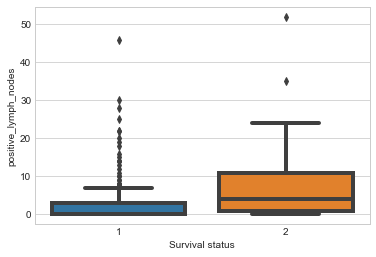

In [64]:
#help(sns.boxplot)
sns.boxplot(x='Survival status',y='positive_lymph_nodes', data=hs,linewidth=4)
plt.show()

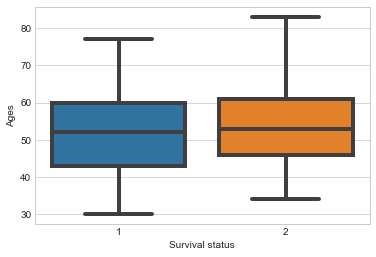

In [66]:
sns.boxplot(x='Survival status',y='Ages', data=hs,linewidth=4)
plt.show()

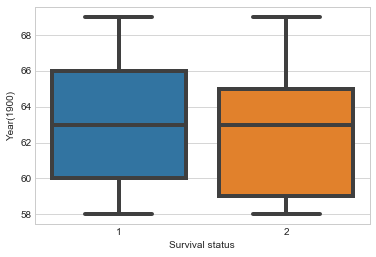

In [67]:
sns.boxplot(x='Survival status',y='Year(1900)', data=hs,linewidth=4)
plt.show()

# Violin plots

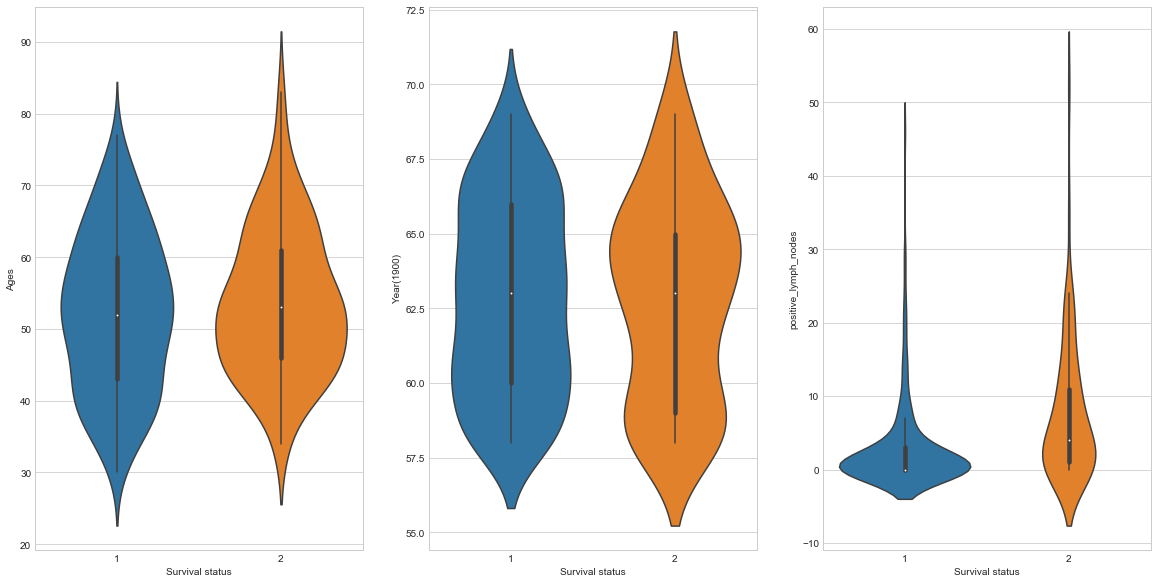

In [88]:
#This plot is the combination of both histogram and box plot so that we will get some more conclusive report 
#form these plots
#help(sns.violinplot)
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
#For plotting 3 dataset versus servival_status 
for i, j in enumerate(list(hs.columns)[:-1]):
    sns.violinplot( x='Survival status',y=j, data=hs, ax=axes[i])
plt.show()

# Observation:

1) From 3rd figure we can able to see the number of positive lymph nodes of the survivors is highly densed from 0 to 5.

2) Almost (75-80)% of the patients have less than or equal to 5 positive lymph survived more than 5 years.

3) From 1st and 2nd violin plots, we can found that more no of patients who are dead have age between 46-62,year between 1959-1965 and the patients who survived have age between 42-60, year between 1960-1966.

# Contour plot

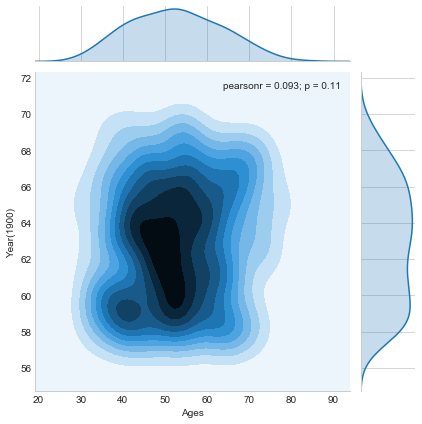

In [78]:
#help(sns.jointplot)
sns.jointplot(x="Ages", y="Year(1900)", data=hs, kind="kde");
plt.show();


form the above plot we can able to visulize that most pepole  undergone operation between the ages (40 - 60) 
during the (1959 - 1964) period 


# Conclusion

1) Dataset is in balanced data set , because servival-status with 1(more than 5 years) is 224 and stauts 2(less than 5 years) is 81

2) All data-set not that much conclusive except the positive_lymph_node , from which we can concluded some-how , how many pepole servived more than 5 years or not .

3) For predicating it required more dataset like which type of opertation happend with patient,insted of postive lymph node any other symptom , becoz some patient with 0 postive _lymph_node also died in between 5 years 